            NAOChange  ONIChange  Total_Consumption  \
Date                                                  
2018-04-01       1.24      -0.50          2350481.0   
2018-05-01       2.12      -0.22          2055019.0   
2018-06-01       1.09      -0.01          2063144.0   
2018-07-01       1.39       0.09          2350719.0   
2018-08-01       1.97       0.23          2313836.0   

            U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf)  \
Date                                                                   
2018-04-01                                           134093.0          
2018-05-01                                           140156.0          
2018-06-01                                           136321.0          
2018-07-01                                           143671.0          
2018-08-01                                           146569.0          

            U.S. Natural Gas Pipeline & Distribution Use (MMcf)  \
Date                                      

/var/folders/2y/d764fpq92556cl5v0l2kjn0r0000gn/T/ipykernel_12741/3500030884.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/2y/d764fpq92556cl5v0l2kjn0r0000gn/T/ipykernel_12741/3500030884.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=Tru

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.3391 - val_loss: 0.4124
Epoch 2/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1275 - val_loss: 0.1000
Epoch 3/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0801 - val_loss: 0.0946
Epoch 4/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0746 - val_loss: 0.0875
Epoch 5/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0667 - val_loss: 0.0796
Epoch 6/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0593 - val_loss: 0.0643
Epoch 7/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0424 - val_loss: 0.0216
Epoch 8/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0168 - val_loss: 0.0189
Epoch 9/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - val_loss: 0.0201
Epoch 10/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0081 - val_loss: 0.0241
Epoch 11/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082 - val_loss: 0.0217
Epoch 12/160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0060 - val_loss: 0.0230
E

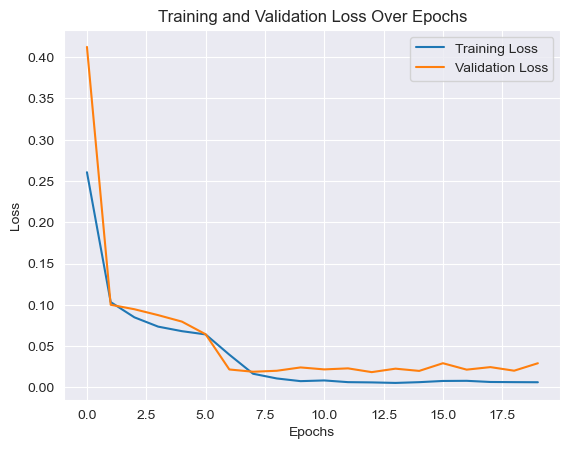

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
             MAE           MSE          RMSE
0  105490.221012  1.618627e+10  127225.27768


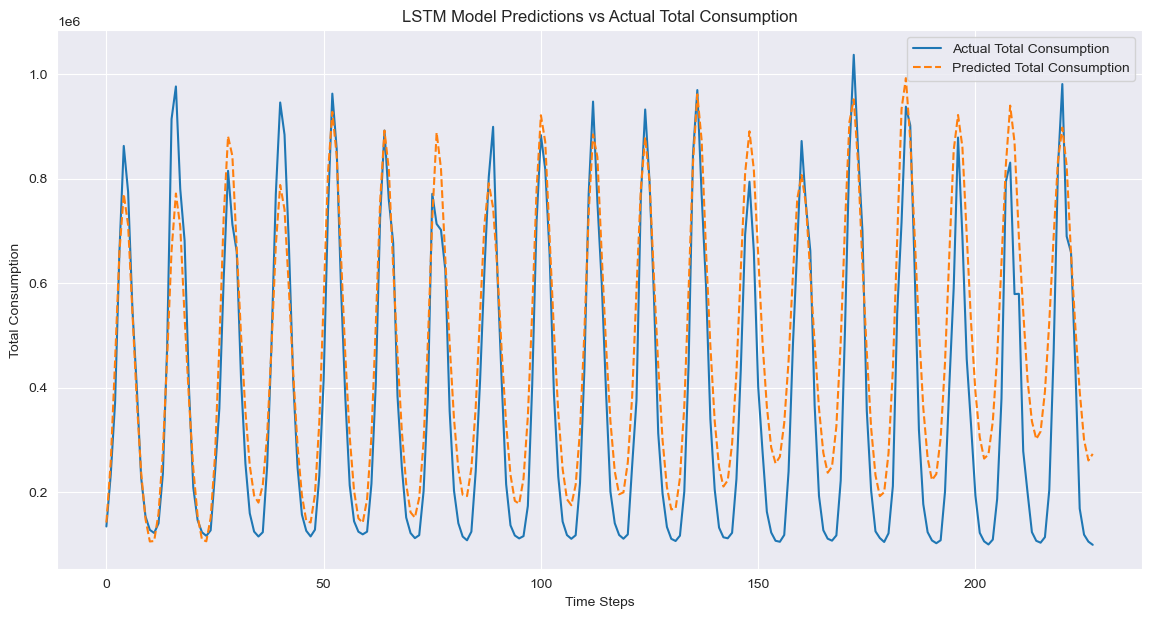

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error


# Set random seeds for reproducibility

# Load your data (using your provided loading steps)
nao_df = pd.read_excel('combined_data.xlsx', sheet_name='NAO')
npi_df = pd.read_excel('combined_data.xlsx', sheet_name='NPI')
oni_df = pd.read_excel('combined_data.xlsx', sheet_name='ONI')
#storage_df = pd.read_excel('combined_data.xlsx', sheet_name='STORAGE')
consumption_df = pd.read_excel('combined_data.xlsx', sheet_name='CONSUMPTION')
consumption_df.dropna(inplace=True)
# Calculate total consumption as the sum of "Residential" and "Commercial"
#consumption_df['Total_Consumption'] = consumption_df['Residential'] + consumption_df['Commercial']
# Merge dataframes on 'Date'
merged_df = nao_df.merge(oni_df, on='Date', how='outer') \
    .merge(consumption_df, on='Date', how='outer') #\
   # .merge(storage_df, on='Date', how='outer')

# Ensure 'Date' is in datetime format and set it as the index
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

# Filter data by date range if dates are in the index
df = merged_df[(merged_df.index >= '1975-09-01') & (merged_df.index <= '2018-08-01')]
# Replace NaN or 0 values in each column with the mean or median of that column
for col in df.columns:
    # Replace NaNs with the mean of the column
    df[col].fillna(df[col].mean(), inplace=True)
    
    # Replace zeros with the median of the column (or use another value if more appropriate)
    df[col].replace(0, df[col].median(), inplace=True)

# Backward fill any remaining NaN values that may still be present after the previous operations
df = df.bfill()  # Backward fill
print(df.tail())
"""
# Set random seeds for reproducibility
# Descriptive statistics
desc_stats = df.describe()
desc_stats.to_csv('descriptive_statistics.csv')  # Save to CSV if needed for the thesis document
print(desc_stats)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

# Histograms for each feature
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Feature Distributions")
plt.show()

"""
# Select input features (all columns except 'Total_Consumption') and target
X_data = df.drop(columns=['U.S. Natural Gas Residential Consumption (MMcf)']).values  # Input features
y_data = df['U.S. Natural Gas Residential Consumption (MMcf)'].values  # Target variable


# Set random seeds for reproducibility
# Scale input features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_data)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y_data.reshape(-1, 1))

# Set sequence length (e.g., 60 time steps)
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(X_scaled)):
    X.append(X_scaled[i - sequence_length:i])
    y.append(y_scaled[i])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Split into training and test sets
split_ratio = 0.5
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# Initialize the LSTM model
model = Sequential()
# Set random seeds for reproducibility
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=40, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=160, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])
# Compile the model
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.show()
# Train the model
#model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
model.save("lstm_model.keras")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to get back to the original scale
predicted_total = scaler_y.inverse_transform(predicted)
y_test_total = scaler_y.inverse_transform(y_test)


mae = mean_absolute_error(y_test_total, predicted_total)
mse = mean_squared_error(y_test_total, predicted_total)

rmse = root_mean_squared_error(y_test_total, predicted_total)
metrics = pd.DataFrame({
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse]
})
print(metrics)
metrics.to_csv("model_metrics.csv")
# Plot predictions vs actual values

plt.figure(figsize=(14, 7))
plt.plot(y_test_total, label="Actual Total Consumption")
plt.plot(predicted_total, label="Predicted Total Consumption", linestyle='--')
plt.title("LSTM Model Predictions vs Actual Total Consumption")
plt.xlabel("Time Steps")
plt.ylabel("Total Consumption")
plt.legend()
plt.show()

   Model            MAE           MSE           RMSE
0   LSTM   80036.844949  1.067524e+10  103321.051921
1  Naïve  132325.210526  2.840458e+10  168536.593468
2   Mean  394129.294009  2.351058e+11  484877.135543


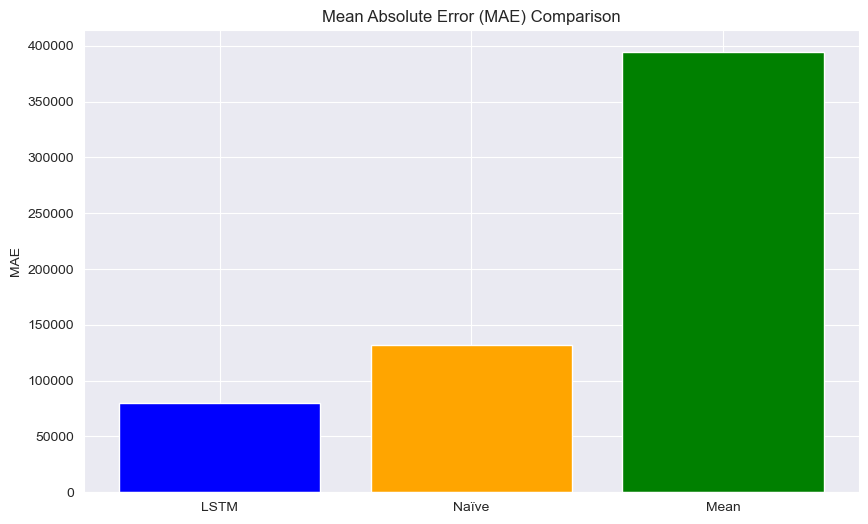

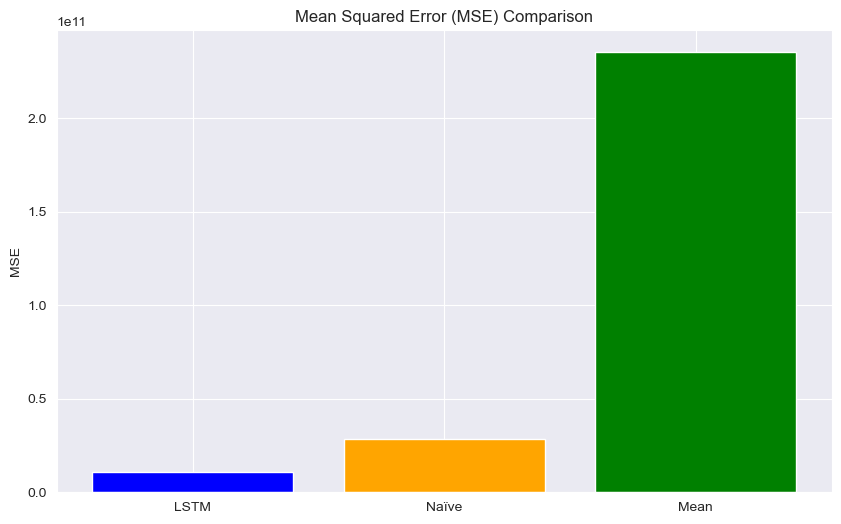

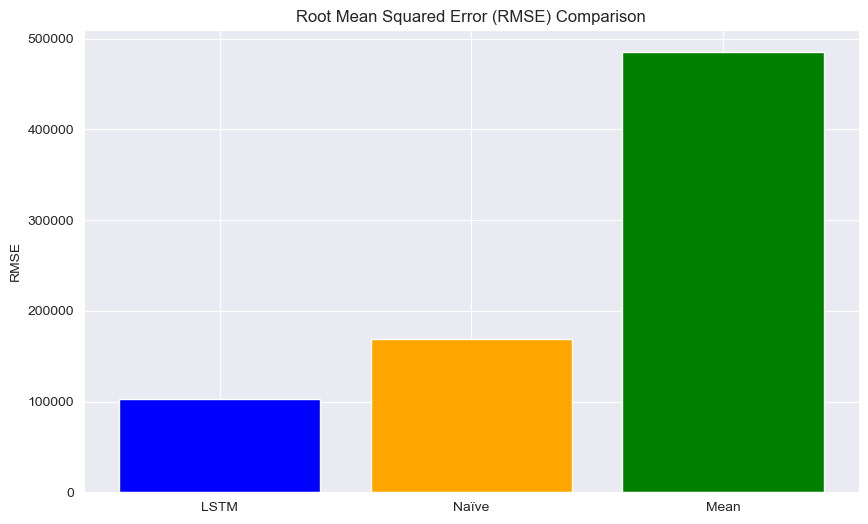

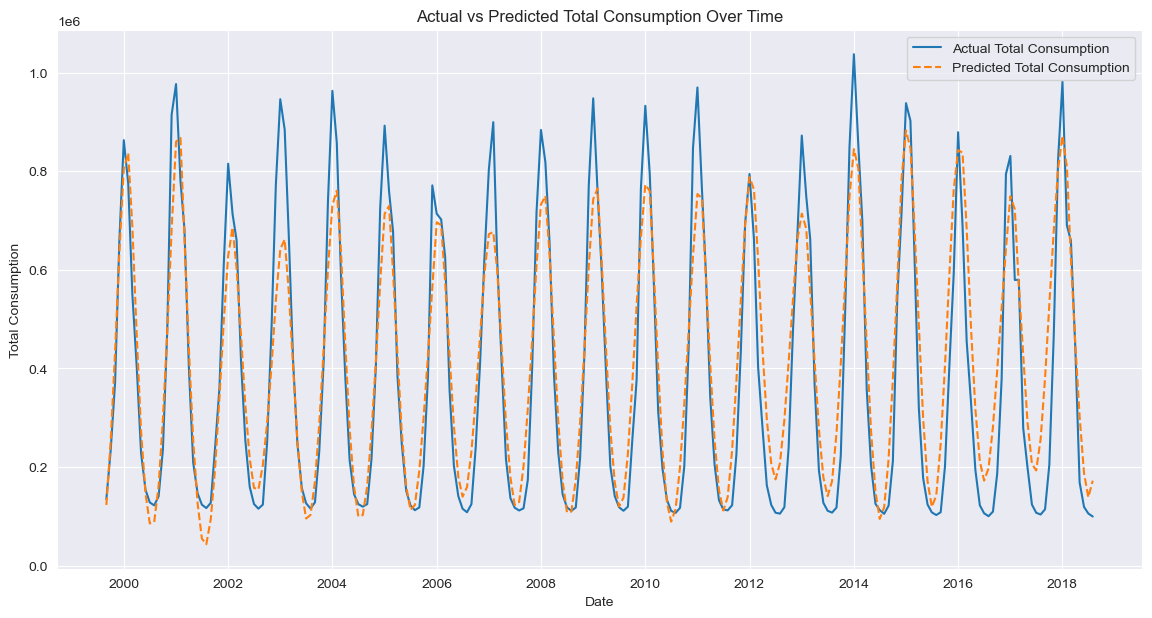

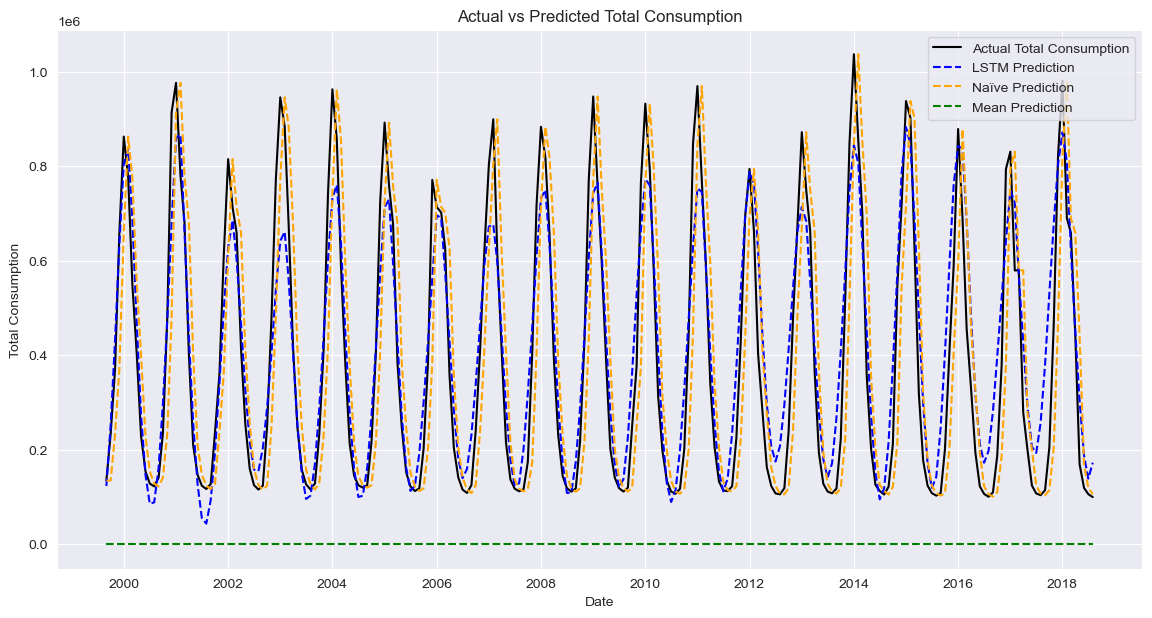

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error


# Inverse transform y_test and predicted to original scale
y_test_original = scaler_y.inverse_transform(y_test)
predicted_original = scaler_y.inverse_transform(predicted)

# Naïve Model: Predicting the previous value (shifted by one time step)
naive_predictions = np.roll(y_test_original, shift=1)
naive_predictions[0] = y_test_original[0]  # Edge case: Use the first value for the first prediction

# Mean Model: Predicting the mean of the training values
mean_prediction = np.mean(y_train)  # Mean of training data in original scale
mean_predictions = np.full_like(y_test_original, mean_prediction)
# Calculate MAE, MSE, and RMSE for each baseline model
naive_mae = mean_absolute_error(y_test_original, naive_predictions)
naive_mse = mean_squared_error(y_test_original, naive_predictions)
naive_rmse = root_mean_squared_error(y_test_original, naive_predictions)

mean_mae = mean_absolute_error(y_test_original, mean_predictions)
mean_mse = mean_squared_error(y_test_original, mean_predictions)
mean_rmse = root_mean_squared_error(y_test_original, mean_predictions)
# Combine metrics for comparison
comparison_metrics = pd.DataFrame({
    "Model": ["LSTM", "Naïve", "Mean"],
    "MAE": [mae, naive_mae, mean_mae],
    "MSE": [mse, naive_mse, mean_mse],
    "RMSE": [rmse, naive_rmse, mean_rmse]
})
print(comparison_metrics)

# Save comparison metrics to CSV
comparison_metrics.to_csv("model_comparison_metrics.csv", index=False)


# Plotting MAE comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_metrics['Model'], comparison_metrics['MAE'], color=['blue', 'orange', 'green'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.show()

# Plotting MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_metrics['Model'], comparison_metrics['MSE'], color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.show()

# Plotting RMSE comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_metrics['Model'], comparison_metrics['RMSE'], color=['blue', 'orange', 'green'])
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.show()

# Get the dates for the test set
test_dates = df.index[-len(y_test):]  # Assuming the last part of the data was used as the test set

# Inverse transform y_test and predicted to original scale if not done
y_test_original = scaler_y.inverse_transform(y_test)
predicted_original = scaler_y.inverse_transform(predicted)

# Plot actual and predicted values along the timeline
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_original, label="Actual Total Consumption")
plt.plot(test_dates, predicted_original, label="Predicted Total Consumption", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total Consumption")
plt.title("Actual vs Predicted Total Consumption Over Time")
plt.legend()
plt.show()
# Assuming 'test_dates' contains the dates of the test set
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_original, label="Actual Total Consumption", color="black")
plt.plot(test_dates, predicted_original, label="LSTM Prediction", linestyle='--', color="blue")
plt.plot(test_dates, naive_predictions, label="Naïve Prediction", linestyle='--', color="orange")
plt.plot(test_dates, mean_predictions, label="Mean Prediction", linestyle='--', color="green")
plt.title("Actual vs Predicted Total Consumption")
plt.xlabel("Date")
plt.ylabel("Total Consumption")
plt.legend()
plt.show()